In [5]:
import sys
print(sys.executable)

C:\Users\sivam\anaconda3\python.exe


In [5]:
//!conda install -c conda-forge opencv -y

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sivam\anaconda3

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       h56e8100_0         155 KB  conda-forge
    cairo-1.16.0               |       hc68a040_5         2.3 MB
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-25.3.1               |  py312h2e8e312_0         1.1 MB  conda-forge
    eigen-3.4.0                |       h91493d7_0         1.0 MB  conda-forge
    fontconfig-2.14.1          |       hb33846d_3         224 KB
    glib-2.78.4                |       hd77b12b_0         491 KB
    glib-tools-2.78.4          |       hd77b12b_0          91 KB
    graphite2-1.3.14           |       h

In [25]:
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
from PIL import Image

In [7]:

from tensorflow.keras.datasets import mnist

In [8]:

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [9]:

print(len(X_train),len(X_test))

60000 10000


In [10]:

X_train = X_train/255
X_test = X_test/255

In [11]:

X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend = X_test.reshape(len(X_test),28*28)

In [12]:

print(X_train_flattend.shape,X_test_flattend.shape)

(60000, 784) (10000, 784)


In [13]:

model = keras.Sequential([
    keras.layers.Dense(128,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattend,Y_train,epochs=10)

C:\Users\sivam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8304 - loss: 0.6698
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9383 - loss: 0.2125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9569 - loss: 0.1519
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9686 - loss: 0.1098
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9747 - loss: 0.0887
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9789 - loss: 0.0746
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9826 - loss: 0.0618
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9853 - loss: 0.0518
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0397
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9914 - loss: 0.0348


In [16]:
model.evaluate(X_test_flattend,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9735 - loss: 0.0857


[0.07563810795545578, 0.9769999980926514]

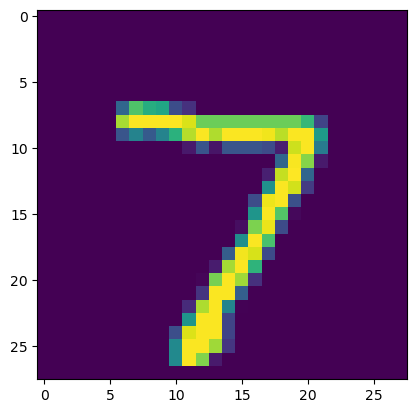

In [17]:
plt.imshow(X_test[0])

In [18]:

Y_pred = model.predict(X_test_flattend)
Y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.3511158e-05, 1.0800291e-03, 9.9863189e-01, 5.5666784e-05,
       1.6018754e-07, 3.1842726e-05, 1.5342004e-04, 7.1017836e-09,
       3.3333450e-05, 1.8994333e-09], dtype=float32)

In [19]:
np.argmax(Y_pred[1])

2

Enter an index (0 to 9999):  7


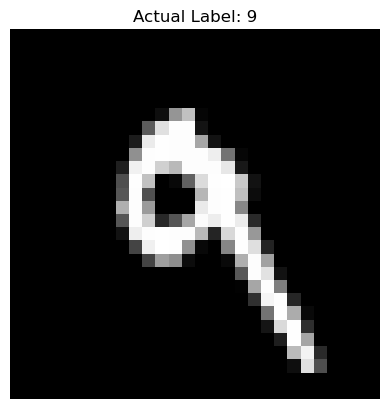

In [21]:
n = int(input("Enter an index (0 to 9999): "))
plt.imshow(X_test[n], cmap='gray')
plt.title(f"Actual Label: {Y_test[n]}")
plt.axis('off')
plt.show()

In [22]:
input_image = X_test_flattend[n].reshape(1, 784)
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Label: 9


In [28]:
import cv2
import numpy as np
from tensorflow import keras

# Load your trained model (skip this if continuing from same session)
# model = keras.models.load_model('your_model.h5')

# Load and preprocess input image
image_path = input("Enter path to the digit image (e.g., 'digit.png'): ")
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize to 28x28 and invert if needed (MNIST digits are white on black)
img_resized = cv2.resize(img, (28, 28))
img_resized = 255 - img_resized  # invert colors if background is white

# Normalize and flatten
img_normalized = img_resized / 255.0
img_flattened = img_normalized.reshape(1, 784)

# Predict
prediction = model.predict(img_flattened)
predicted_label = np.argmax(prediction)

print(f"Predicted Digit: {predicted_label}")


Enter path to the digit image (e.g., 'digit.png'):  datasets//7_img(NN).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Digit: 7


In [27]:
model.save("mnist_model.h5")

In [ ]:
#run app.py from vs code or any terminal load a digit image and wait for result
